In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [3]:
possible_paths = [
    '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv',
]

for p in possible_paths:
    if os.path.exists(p):
        df = pd.read_csv(p)
        print(f'Loaded: {p}')
        break
else:
    raise FileNotFoundError("Mall_Customers.csv not found. Please place it in ./data/ or update path.")


Loaded: /kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [4]:
print("\nDataset head:")
print(df.head())


Dataset head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())


Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
feature_candidates = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[feature_candidates]


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, km.labels_))

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

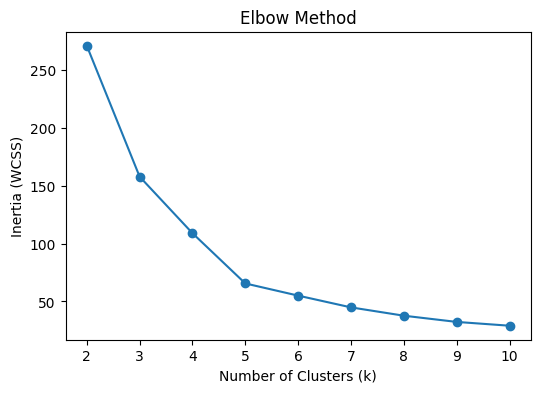

In [9]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.show()

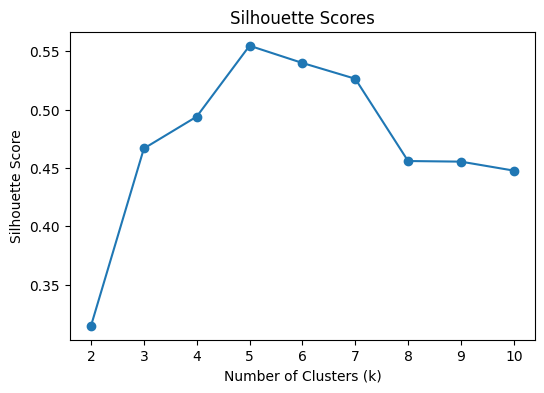

In [10]:
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

In [11]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


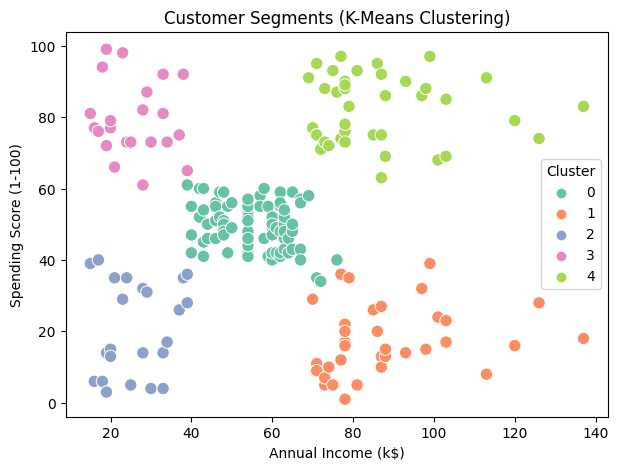

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df[feature_candidates[0]], 
                y=df[feature_candidates[1]], 
                hue=df['Cluster'], 
                palette='Set2', 
                s=80)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [13]:
print("\nCluster centers (scaled back):")
centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, c in enumerate(centers):
    print(f"Cluster {i}: Income={c[0]:.2f}, Spending Score={c[1]:.2f}")

print("\nAverage values per cluster:")
print(df.groupby('Cluster')[feature_candidates].mean())


Cluster centers (scaled back):
Cluster 0: Income=55.30, Spending Score=49.52
Cluster 1: Income=88.20, Spending Score=17.11
Cluster 2: Income=26.30, Spending Score=20.91
Cluster 3: Income=25.73, Spending Score=79.36
Cluster 4: Income=86.54, Spending Score=82.13

Average values per cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 88.200000               17.114286
2                 26.304348               20.913043
3                 25.727273               79.363636
4                 86.538462               82.128205


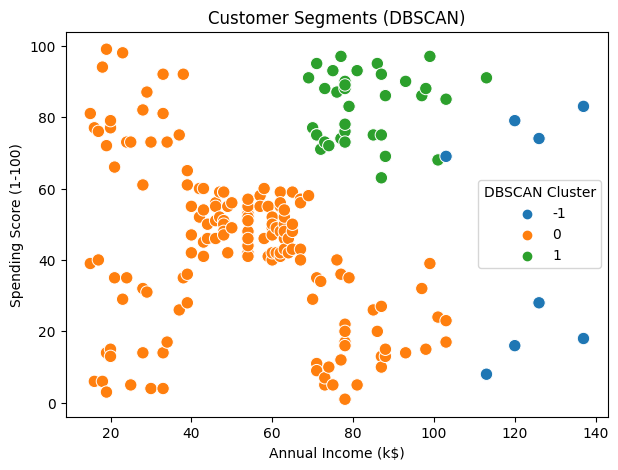

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=df[feature_candidates[0]], 
                y=df[feature_candidates[1]], 
                hue=df['DBSCAN_Cluster'], 
                palette='tab10', 
                s=80)
plt.title('Customer Segments (DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='DBSCAN Cluster')
plt.show()